#Task #1: Un-sharp Masking 

Perform un-sharp masking on the following image. Does this enhance the image? Try with at least two different smoothing methods. How does that affect the results? 

In [ ]:
import numpy as np
import cv2 as cv
from PIL import Image,ImageOps
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
import math
%matplotlib inline

In [ ]:
img = Image.open('unsharpmasking.tif')
img = img.convert("L")
img_orig = np.array(img)

In [ ]:
img_array = np.array(img)

In [ ]:
img_array = cv.copyMakeBorder(img_array, 2, 2, 2, 2,cv.BORDER_REPLICATE)

In [ ]:
kernel = np.ones((3,3),dtype='int')

In [ ]:
soc_list = kernel.ravel()
soc = np.sum(soc_list)

In [ ]:
output_img = np.zeros((img.size[1],img.size[0]),dtype='int')

In [ ]:
for x in range(2,img_array.shape[1]-3):
  for y in range(2,img_array.shape[0]-3):
    aoi = img_array[y-1:y+2, x-1:x+2]
    k = ((aoi * kernel).sum())/soc
    output_img[y-2][x-2]=k

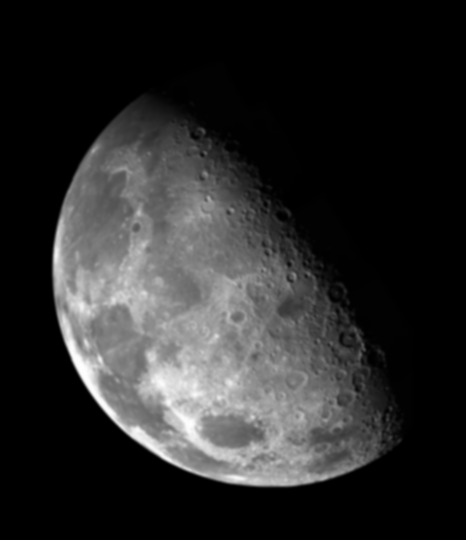

In [ ]:
blurred_img_data = output_img.astype(np.uint8)
blurred_img  = Image.fromarray(blurred_img_data)
blurred_img

In [ ]:
subtracted =  img_orig - blurred_img_data
subtracted

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

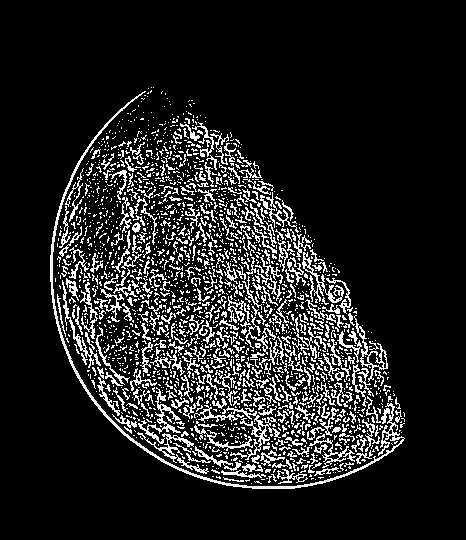

In [ ]:
masked_data = subtracted.astype(np.uint8) 
masked_img  = Image.fromarray(masked_data)
masked_img

In [ ]:
img_new_data = img_orig +  masked_data
img_new_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

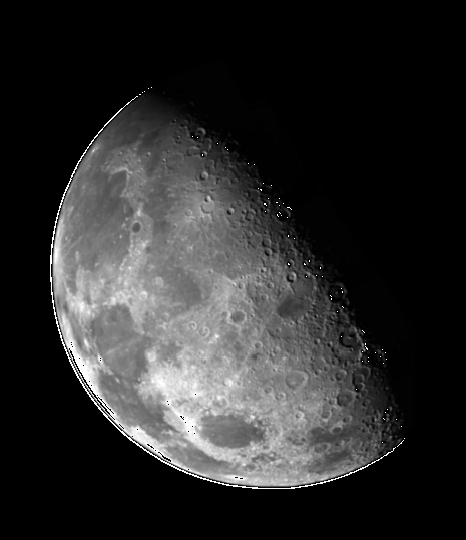

In [ ]:
unsharp_data = img_new_data.astype(np.uint8) 
unsharp_data_img  = Image.fromarray(unsharp_data)
unsharp_data_img

#Task #2: Removal of Salt and Pepper noise 

An image having salt and pepper noise is given below. Which filtering approach do you consider will suit best to remove the said noise? Apply the approach and show results.

In [ ]:
import numpy as np
import cv2 as cv
from PIL import Image,ImageOps
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
import math
%matplotlib inline

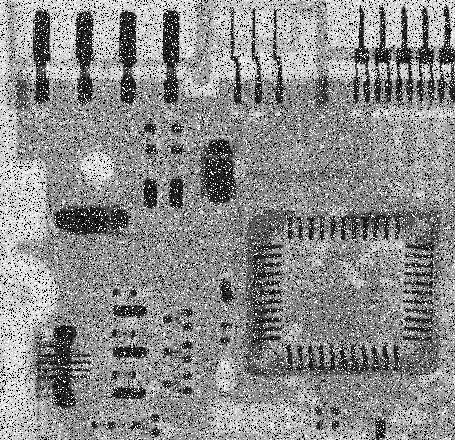

In [ ]:
img = Image.open('saltandpaper.tif')
img = img.convert("L")
img

In [ ]:
img_array = np.array(img)
img_array.shape

(440, 455)

In [ ]:
img_array = cv.copyMakeBorder(img_array, 2, 2, 2, 2,cv.BORDER_REPLICATE)
img_array.shape

(444, 459)

In [ ]:
output_img = np.zeros((img.size[1],img.size[0]),dtype='int')
output_img.shape

(440, 455)

In [ ]:
for i in range(2,img_array.shape[0]-3):
  for j in range(2,img_array.shape[1]-3):
    aoi = img_array[i-1:i+2, j-1:j+2]
    output_img[i-2][j-2] = np.median(aoi)



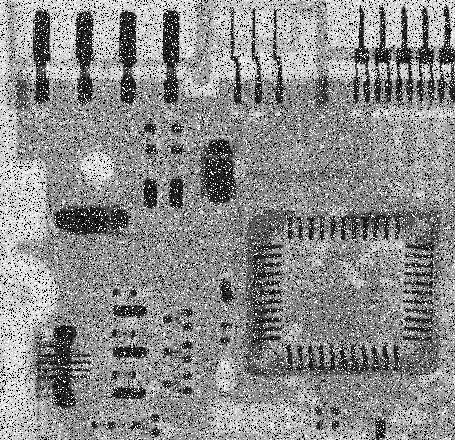

In [ ]:
img

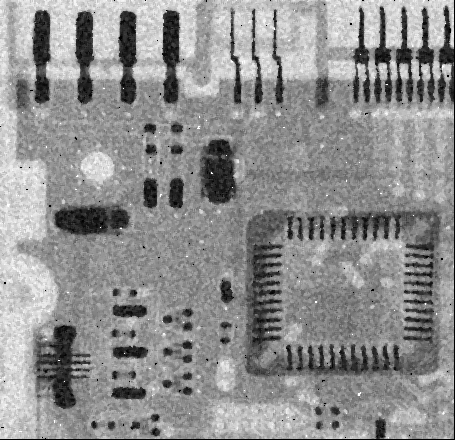

In [ ]:
salt_pep = output_img.astype(np.uint8)
output_depep  = Image.fromarray(salt_pep)
output_depep

#Task #3: Sharpening filters

In [ ]:
import numpy as np
import cv2 as cv
from PIL import Image,ImageOps
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
import math
%matplotlib inline

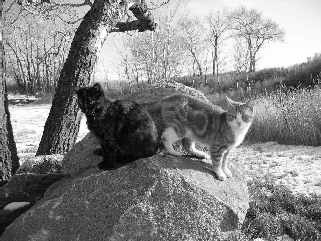

In [ ]:
img = Image.open('two_cats.jpg')
img = img.convert("L")
img_a = np.array(img)
img

In [ ]:
gx = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
gy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

In [ ]:
[rows, columns] = np.shape(img)

In [ ]:
x_img = np.zeros(shape=(rows, columns))
y_img = np.zeros(shape=(rows, columns))
output_img = np.zeros(shape=(rows, columns))

In [ ]:
for i in range(rows - 2):
    for j in range(columns - 2):
      masked = abs(np.sum(np.multiply(gx, img_a[i:i + 3, j:j + 3])))
      x_img[i+1][j+1]=masked
x_img

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,  10.,  44., ...,   4.,   2.,   0.],
       [  0.,  61., 205., ...,   4.,   1.,   0.],
       ...,
       [  0.,  18.,   4., ..., 406.,  50.,   0.],
       [  0.,  23.,  10., ..., 211.,  11.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [ ]:
for i in range(rows - 2):
    for j in range(columns - 2):
      masked = abs(np.sum(np.multiply(gy, img_a[i:i + 3, j:j + 3])))
      y_img[i+1][j+1]=masked
y_img

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0., 106., 202., ...,   4.,   4.,   0.],
       [  0.,  77.,  91., ...,   6.,   7.,   0.],
       ...,
       [  0.,  38.,   2., ..., 228.,  84.,   0.],
       [  0.,   9.,  16., ...,  25., 137.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

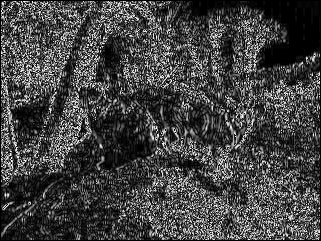

In [ ]:
x_img = x_img.astype(np.uint8) 
x_img_output  = Image.fromarray(x_img)
x_img_output

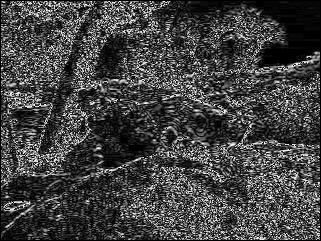

In [ ]:
y_img = y_img.astype(np.uint8) 
y_img_output  = Image.fromarray(y_img)
y_img_output

In [ ]:
for i in range(rows - 2):
    for j in range(columns - 2):
      output_img[i + 1, j + 1] = np.sqrt(x_img[i][j] ** 2 + y_img[i][j] ** 2)

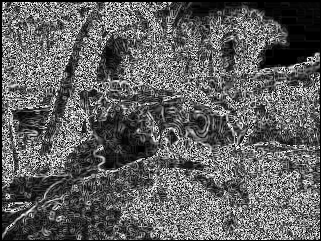

In [ ]:
output_img = output_img.astype(np.uint8) 
output_img_final  = Image.fromarray(output_img)
output_img_final